In [ ]:
%run /content/drive/MyDrive/Colab\ Notebooks/mathutil.ipynb

In [ ]:
%run /content/drive/MyDrive/Colab\ Notebooks/5_MLP_Dataset.ipynb

#1. AbaloneDataset

In [ ]:
abalone_path = '/content/drive/MyDrive/ml-data/Abalone/abalone.csv'

In [ ]:
class AbaloneDataset(Dataset):
  def __init__(self):
    name, mode = 'abalone', 'regression'
    super(AbaloneDataset, self).__init__(name, mode)
    rows, _ = load_csv(abalone_path)
    xs = np.zeros([len(rows), 10])
    ys = np.zeros([len(rows), 1])

    for n, row in enumerate(rows):
      if row[0] == 'I': xs[n, 0] = 1
      if row[0] == 'M': xs[n, 1] = 1
      if row[0] == 'F': xs[n, 2] = 1
      xs[n, 3:] = row[1:-1]
      ys[n, :] = row[-1:]
    self.shuffle_data(xs, ys, 0.8, 0.05)
  
  def visualize(self, xs, estimates, answers):
    for n in range(len(xs)):
      x, est, ans = xs[n], estimates[n], answers[n]
      xstr = vector_to_str(x, '%4.2f')
      print('{} => 추정 {:4.1f} : 정답 {:4.1f}'.format(xstr, est[0], ans[0]))

In [ ]:
# abaloneDB = AbaloneDataset()
# model = MlpModel('abaloneModel', abaloneDB, [])
# model.exec_all(epoch_count=10, report=2, show_cnt=5)

#2. PulsarDataset

In [ ]:
pulsar_path = '/content/drive/MyDrive/ml-data/Pulsar/pulsar_stars.csv'

In [ ]:
class PulsarDataset(Dataset):
  
  def __init__(self):
    name, mode = 'pulsar', 'binary'
    super(PulsarDataset, self).__init__(name, mode)
    rows, _ = load_csv(pulsar_path)
    data = np.asarray(rows, dtype="float32")
    self.shuffle_data(data[:,:-1], data[:,-1:], 0.8, 0.05)
    self.target_names = ['star', 'pulsar']
  
  def visualize(self, xs, estimates, answers):
    for n in range(len(xs)):
      x, est, ans = xs[n], estimates[n], answers[n]
      xstr = vector_to_str(x, '%5.1f', 3)
      est_target = self.target_names[int(round(est[0]))]
      ans_target = self.target_names[int(round(ans[0]))]
      result = 'O'
      if est_target != ans_target:
        result = 'X'
      print('{} => [ 추정 {}(확률 {:4.2f}) : 정답 {} ] => {}'.\
            format(xstr, est_target, est[0], ans_target, result))

In [ ]:
# pulsarDB = PulsarDataset()
# pulsarModel = MlpModel('pulsarModel', pulsarDB, [4])
# pulsarModel.exec_all()

#3. SteelDataset

In [ ]:
steel_path = '/content/drive/MyDrive/ml-data/Faults/faults.csv'

In [ ]:
class SteelDataset(Dataset):
  def __init__(self):
    name, mode = 'steel', 'select'
    super(SteelDataset, self).__init__(name, mode)
    rows, header = load_csv(steel_path)
    data = np.asarray(rows, dtype="float32")
    self.shuffle_data(data[:,:-7], data[:,-7:], 0.8, 0.05)
    self.target_names = header[-7:]
  
  def visualize(self, xs, estimates, answers):
    show_select_results(estimates, answers, self.target_names)

In [ ]:
# steelDB = SteelDataset()
# model = MlpModel('steelModel', steelDB, [12, 7])
# model.exec_all(epoch_count=100, learning_rate=0.000001, report=10)

#4. FlowerDataset

In [ ]:
flowers_path = '/content/drive/MyDrive/ml-data/flowers'

In [ ]:
class FlowersDataset(Dataset):
  pass

In [ ]:
def flowers_init(self, resolution=[100, 100], input_shape=[-1]):
  name, mode = 'flowers', 'select'
  super(FlowersDataset, self).__init__(name, mode)
  path = flowers_path
  self.target_names = list_dir(path)
  
  images = []
  idxs = []
  for dx, dname in enumerate(self.target_names):
    subpath = path + '/' + dname
    filenames = list_dir(subpath)
    for fname in filenames:
      if fname[-4:] != '.jpg':
        continue
      imagepath = os.path.join(subpath, fname)
      pixels = load_image_pixels(imagepath, resolution, input_shape)
      images.append(pixels)
      idxs.append(dx)
  self.image_shape = resolution + [3]
  xs = np.asarray(images, np.float32)
  ys = onehot(idxs, len(self.target_names))
  self.shuffle_data(xs, ys, 0.8, 0.05)

FlowersDataset.__init__ = flowers_init

In [ ]:
def flowers_visualize(self, xs, estimates, answers):
  draw_images_horz(xs, self.image_shape)
  show_select_results(estimates, answers, self.target_names)

FlowersDataset.visualize = flowers_visualize

In [ ]:
# flowersDB = FlowersDataset()

Model flowersModel train started:
Epoch 2: cost=1.511, accuracy=0.321/0.360 (11/11 secs)
Epoch 4: cost=1.390, accuracy=0.399/0.490 (11/22 secs)
Epoch 6: cost=1.328, accuracy=0.403/0.320 (10/32 secs)
Epoch 8: cost=1.285, accuracy=0.441/0.420 (11/43 secs)
Epoch 10: cost=1.247, accuracy=0.446/0.450 (11/54 secs)
Model flowersModel train ended in 54 secs:
Model flowersModel test report: accuracy=0.421, (0 secs)

Model flowersModel Visualization


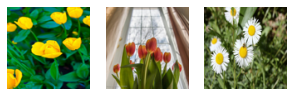

추정확률 분포 [52,38, 2, 1, 7] => 추정 daisy : 정답 tulip => X
추정확률 분포 [33,42, 5, 7,13] => 추정 dandelion : 정답 tulip => X
추정확률 분포 [37,57, 1, 1, 4] => 추정 dandelion : 정답 daisy => X


In [ ]:
# model = AdamModel('flowersModel', flowersDB, [30, 10])
# model.exec_all(epoch_count=10, report=2, show_cnt=3)